# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## H<sub>2</sub>

In [2]:
bond_lengths = np.linspace(0.2,2.6,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('h2', bond_lengths, basis, method='fci')

E = 0.15748213365503272 Eh
E = -0.8488991062024303 Eh
E = -1.0882281844069168 Eh
E = -1.136928959400571 Eh
E = -1.1229570527982327 Eh
E = -1.0887645364963472 Eh
E = -1.050442037218747 Eh
E = -1.0154682491653277 Eh
E = -0.987392996293216 Eh
E = -0.9670259116093083 Eh
E = -0.9534242125062942 Eh
E = -0.9449089870950516 Eh
E = -0.9398197912188275 Eh
E = -0.9368706035283361 Eh
E = -0.9351960308386078 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('h2', bond_lengths, basis,  method='hf')

E = 0.16412595411335862 Eh
E = -0.8397057843499789 Eh
E = -1.074887931719117 Eh
E = -1.1175258568986912 Eh
E = -1.0951595815644795 Eh
E = -1.0495617842752072 Eh
E = -0.9960202460350677 Eh
E = -0.9415475409906814 Eh
E = -0.8899750208893146 Eh
E = -0.8432718025417755 Eh
E = -0.8022428650141384 Eh
E = -0.7669825247359998 Eh
E = -0.7371545448988288 Eh
E = -0.7121961606082431 Eh
E = -0.6914700512624794 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('h2', bond_lengths, basis,  method='ccsd')

E = 0.15748412056436217 Eh
E = -0.8488985094851161 Eh
E = -1.0882310174307857 Eh
E = -1.1369333351418656 Eh
E = -1.1229593878059763 Eh
E = -1.0887606905920533 Eh
E = -1.050426089327126 Eh
E = -1.015441636439638 Eh
E = -0.9873692257052735 Eh
E = -0.9670168314563374 Eh
E = -0.9534301294889956 Eh
E = -0.9449225613845066 Eh
E = -0.9398332746700124 Eh
E = -0.9368793989542732 Eh
E = -0.9351989265367034 Eh


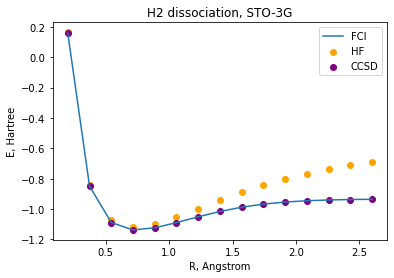

In [6]:
#Plot H2 PESs

plt.title('H2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

<img src="figs/testimage.png">

## H<sub>2</sub>O symmetric O-H dissociation

In [7]:
bond_lengths = np.linspace(0.5,2.7,15)

In [8]:
#Run FCI
FCI_PES = obtain_PES('h2o', bond_lengths, basis, method='fci')

E = -73.14278405998414 Eh
E = -74.47523205268014 Eh
E = -74.90413378058017 Eh
E = -75.01383133956654 Eh
E = -75.00356512166928 Eh
E = -74.95170869126783 Eh
E = -74.89218648216018 Eh
E = -74.83923063661699 Eh
E = -74.79866365936574 Eh
E = -74.77161515186775 Eh
E = -74.75568947214684 Eh
E = -74.74704715251242 Eh
E = -74.74248898749448 Eh
E = -74.74007426712959 Eh
Could not converge


In [9]:
#Run HF
HF_PES = obtain_PES('h2o', bond_lengths, basis,  method='hf')

E = -73.12948161321476 Eh
E = -74.45343797011796 Eh
E = -74.87055361047916 Eh
E = -74.96308510923626 Eh
E = -74.92817508740148 Eh
E = -74.84281942863211 Eh
E = -74.74051950148022 Eh
E = -74.63577758413845 Eh
E = -74.53576638656821 Eh
E = -74.44494384742121 Eh
E = -74.36975504260424 Eh
E = -74.29778481417813 Eh
E = -74.2416722005104 Eh
E = -74.27129957698466 Eh
Could not converge


In [10]:
#Run CCSD
CCSD_PES = obtain_PES('h2o', bond_lengths, basis,  method='ccsd')

E = -73.14276363918694 Eh
E = -74.47519485717145 Eh
E = -74.90406353010552 Eh
E = -75.01370018934803 Eh
E = -75.00330155818898 Eh
E = -74.95116757042634 Eh
E = -74.89128367467829 Eh
E = -74.83853401139109 Eh
E = -74.80070162376026 Eh
E = -74.7810573871734 Eh
E = -74.74394274758566 Eh
E = -74.77972801511767 Eh
E = -74.7833896345312 Eh
E = -74.64224434262873 Eh
Could not converge


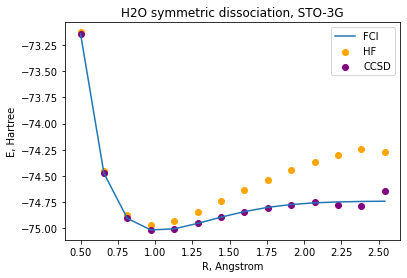

In [11]:
#Plot H2O PESs

plt.title('H2O symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## LiH

In [ ]:
bond_lengths = np.linspace(0.5,3.5,31)
print('Running FCI')
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

Running FCI
E = -7.050225036066642 Eh
E = -7.319318938170493 Eh
E = -7.505051767361807 Eh
E = -7.634167329728353 Eh
E = -7.723423721347238 Eh
E = -7.784460280267016 Eh
E = -7.825536957974943 Eh
E = -7.852430853316401 Eh
E = -7.869139976429565 Eh
E = -7.878453652319019 Eh
E = -7.882362286810953 Eh
E = -7.882324378871222 Eh
E = -7.8794335165319636 Eh
E = -7.874524024942922 Eh
E = -7.868240793792822 Eh
E = -7.861087772411142 Eh
E = -7.853462904979664 Eh
E = -7.8456836231164235 Eh
E = -7.8380050025471135 Eh
E = -7.830631624342838 Eh
E = -7.823723883389364 Eh
E = -7.8173999273756625 Eh
E = -7.8117353390570266 Eh
E = -7.806763402503807 Eh
E = -7.802478452788826 Eh
E = -7.798843159455239 Eh
E = -7.795798533270906 Eh
E = -7.793274300625994 Eh
E = -7.791197565942319 Eh
E = -7.789498785374102 Eh
E = -7.788115123260219 Eh
Running HF
E = -7.0284717535917025 Eh
E = -7.299610442693042 Eh
E = -7.4860204040661715 Eh
E = -7.615847732045305 Eh
E = -7.705830270834717 Eh
E = -7.767438446509383 Eh
E = -7.8

In [ ]:
plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## H<sub>4</sub> angle

In [ ]:
angles = np.linspace(85,95,21)
print('Running FCI')
FCI_PES = obtain_PES('h4', angles, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('h4', angles, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('h4', angles, basis,  method='ccsd')

In [ ]:
fig = plt.figure(figsize=(5,5))
ax.set_title('H4 angle, STO-3G')
ax.set_xlabel('Angle, Degrees')
ax.set_ylabel('E, Hartree')
ax = fig.add_subplot(1,1,1)
ax.plot(angles, FCI_PES, label='FCI')
ax.scatter(angles, HF_PES, label='HF', color='orange')
ax.scatter(angles, CCSD_PES, label='CCSD', color='purple')
ax.legend()

## N<sub>2</sub>

In [ ]:
bond_lengths = np.linspace(0.6,1.8,26)
print('Running FCI')
FCI_PES = obtain_PES('n2', bond_lengths, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('n2', bond_lengths, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('n2', bond_lengths, basis,  method='ccsd')

In [ ]:
plt.title('N2 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## NH<sub>3</sub>

In [ ]:
bond_lengths = np.linspace(0.5,2.0,16)
print('Running FCI')
FCI_PES = obtain_PES('nh3', bond_lengths, basis, method='fci')
print('Running HF')
HF_PES = obtain_PES('nh3', bond_lengths, basis,  method='hf')
print('Running CCSD')
CCSD_PES = obtain_PES('nh3', bond_lengths, basis,  method='ccsd')

In [ ]:
plt.title('NH3 dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()